<a href="https://colab.research.google.com/github/ThuanPhat2709/BT-AI/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MONEY

## Import Library

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input,MaxPooling2D,Conv2D
from keras.backend import conv2d
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import cv2
import os
import tensorflow as  tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

## Data Processing

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [37]:
train_set=train.flow_from_directory('/content/drive/MyDrive/money/Train',
                                    target_size = (150,300),
                                    batch_size = 5,
                                    class_mode = 'categorical')
valid_set=validation.flow_from_directory('/content/drive/MyDrive/money/Validation',
                                    target_size = (150,300),
                                    batch_size = 5,
                                    class_mode = 'categorical')

Found 110 images belonging to 11 classes.
Found 55 images belonging to 11 classes.


## Create Model

In [38]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same",input_shape=(150,300,3)))
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
#ANN
model.add(Flatten())
model.add(Dense(512,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 150, 300, 16)      448       
                                                                 
 conv2d_73 (Conv2D)          (None, 150, 300, 16)      2320      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 75, 150, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 75, 150, 32)       4640      
                                                                 
 conv2d_75 (Conv2D)          (None, 75, 150, 32)       9248      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 37, 75, 32)       0         
 g2D)                                                 

In [39]:
opt=SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [40]:
history=model.fit(train_set,epochs=60, batch_size=32,validation_data=(valid_set),verbose=1)

Epoch 1/60
22/22 [==============================] - 3s 93ms/step - loss: 2.5659 - accuracy: 0.0364 - val_loss: 2.5163 - val_accuracy: 0.0909
Epoch 2/60
22/22 [==============================] - 2s 81ms/step - loss: 2.5588 - accuracy: 0.1182 - val_loss: 2.3383 - val_accuracy: 0.0909
Epoch 3/60
22/22 [==============================] - 2s 81ms/step - loss: 2.3543 - accuracy: 0.1182 - val_loss: 2.3192 - val_accuracy: 0.1818
Epoch 4/60
22/22 [==============================] - 2s 82ms/step - loss: 2.3148 - accuracy: 0.1818 - val_loss: 2.2493 - val_accuracy: 0.2545
Epoch 5/60
22/22 [==============================] - 2s 82ms/step - loss: 2.2652 - accuracy: 0.2000 - val_loss: 2.1843 - val_accuracy: 0.2727
Epoch 6/60
22/22 [==============================] - 2s 82ms/step - loss: 2.1961 - accuracy: 0.1909 - val_loss: 2.1351 - val_accuracy: 0.2000
Epoch 7/60
22/22 [==============================] - 2s 81ms/step - loss: 2.1359 - accuracy: 0.2273 - val_loss: 2.1721 - val_accuracy: 0.2364
Epoch 8/60
22

## Create Label

In [42]:
Names={0: '1000DONG',
 1: '10.000DONG',
 2: '100.00DONG',
 3: '200DONG',
 4: '2000DONG',
 5: '20.000DONG',
 6: '200.000DONG',
 7: '500DONG',
 8: '5000DONG',
 9: '50.000DONG',
 10: '500.000DONG'}

## Test Model

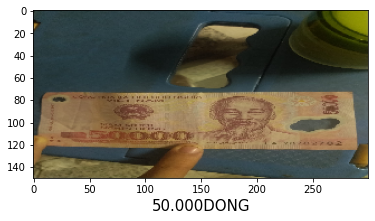

In [43]:
img=load_img('5.jpg',target_size=(150,300,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,300,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

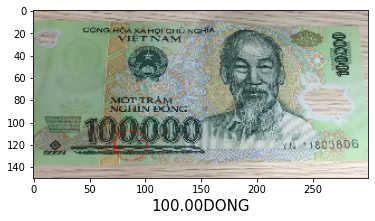

In [45]:
img=load_img('8.jpg',target_size=(150,300,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,300,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

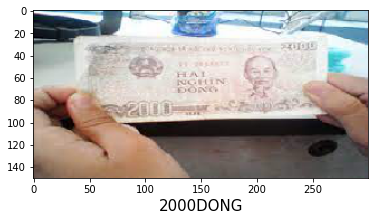

In [47]:
img=load_img('3.jfif',target_size=(150,300,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,300,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

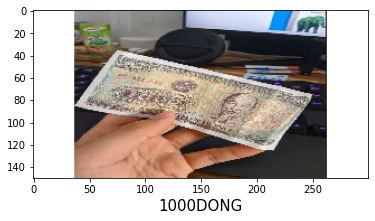

In [48]:
img=load_img('5.jfif',target_size=(150,300,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,150,300,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

## Accuracy

In [49]:
score=model.evaluate(valid_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

11/11 [==============================] - 0s 24ms/step - loss: 0.5523 - accuracy: 0.7636
Sai số:  0.5522655248641968
Độ chính xác:  0.7636363506317139


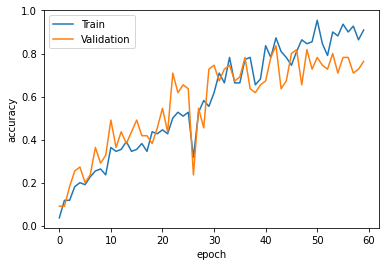

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

## Save Model

In [51]:
model.save('Money.h5')#lưu mô hình
from tensorflow.keras.models import load_model
model5=load_model('Money.h5')